### Exploratory Data Analysis on Fetal Health Data

Import libraries

In [5]:
#importing the packages will using for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
%matplotlib inline

pd.set_option('display.max_columns',300)
plt.style.use('seaborn')
sns.set(rc={'figure.facecolor':'cornflowerblue'})

Read data

In [7]:
#reading the csv file
df=pd.read_csv('C:\\Users\\acer\\Desktop\\ModelTuning_FetalHealth\\data\\Fetal_Health.csv')
df_copy=df
df_copy.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Information about the data

In [8]:
#getting information of DataFrame
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
#shape of the dataset
df_copy.shape

(2126, 22)

Describe data

In [10]:
df_copy.describe(include='all')

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [11]:
#renaming column name to make easier to work with
df_copy=df_copy.rename(columns={'baseline value':'baseline_value','prolongued_decelerations':'prolonged_decelerations'})
df_copy.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

missing data, if there are some missing data that we have to fixed it

In [12]:
#checking null values
df_copy.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolonged_decelerations                                   0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

There are no null values in the dataset.

In [14]:
#checking the numerical variables
num_var = [i for i in df_copy.columns if df_copy[i].dtypes != 'string']
print(num_var)

['baseline_value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolonged_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']


In [15]:
#checking the categorical variables
cat_var=[j for j in df_copy.columns if df_copy[j].dtypes=='string']
cat_var

[]

In [32]:
df_copy[df_copy.duplicated()] #denoting the duplicate rows
#check if there is any duplicates in the dataset.

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,10.3,60.0,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,13.8,74.0,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,5.8,21.0,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,6.9,97.0,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,10.6,81.0,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,15.4,90.0,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,14.8,82.0,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,7.0,19.0,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,10.3,51.0,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


There are some duplicates in the dataset

In [35]:
#dropping duplicates
df_copy = df.drop_duplicates(subset = None , keep = 'first', inplace = False)
df_copy

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


after dropping the duplicates we have 2113 rows and 22 features.

<AxesSubplot:>

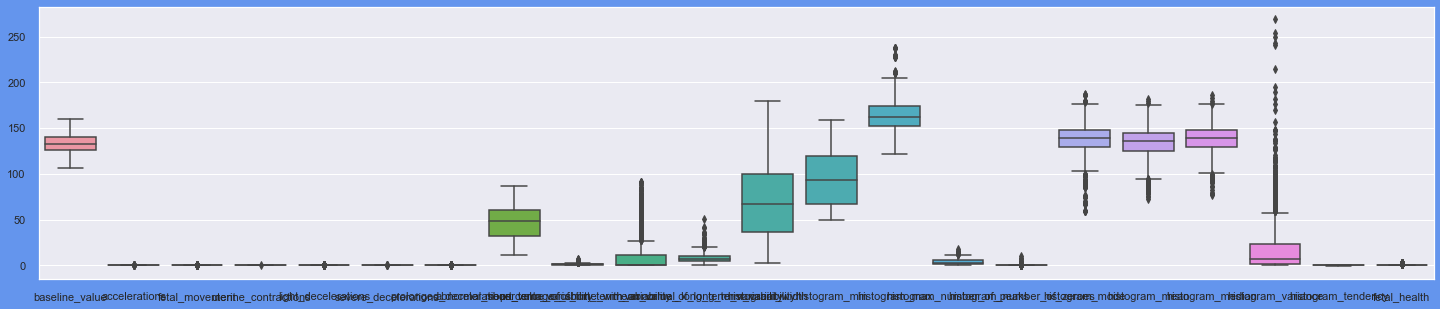

In [18]:
#checking the outliers in the dataframe
plt.figure(figsize=(25,5))
sns.boxplot(data=df_copy)

In [19]:
# plt.figure(figsize=(20,5))
# sns.violinplot(data=df_copy)

In [21]:
#To more understand data we will find correlation between fetal health and other features.
df_copy.corr()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline_value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolonged_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


<AxesSubplot:>

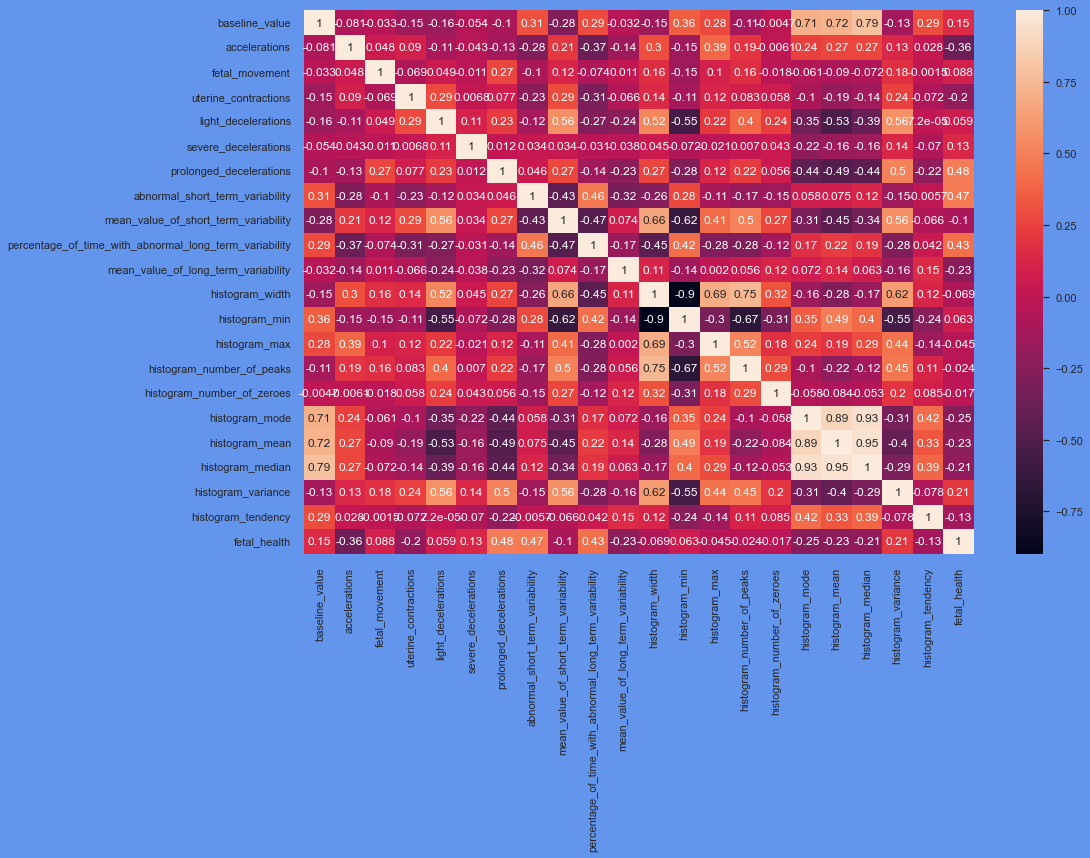

In [22]:
#generate heatmap to display correlations in data
plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(),annot=True)

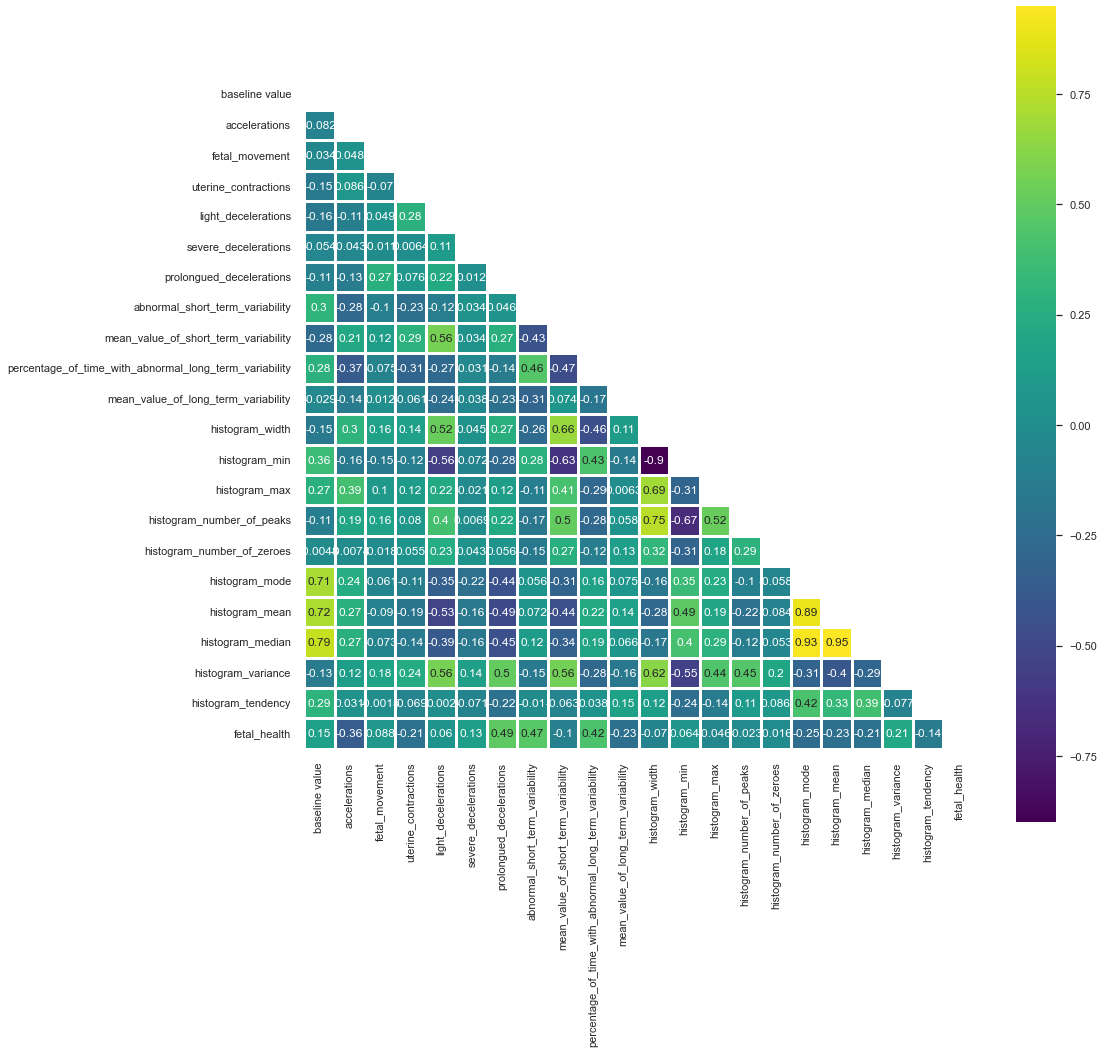

In [39]:
target = df_copy["fetal_health"]
corr = df_copy.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, axes = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="viridis",annot=True)

There is strong correlation between baseline value and histogram mode , histogram median and histogram mean. Histogram number of peaks and histogram width is also having good correlation.

In [30]:
#Univariate Analysis
#Checking skewness
df_copy.skew()

baseline_value                                             0.020312
accelerations                                              1.204392
fetal_movement                                             7.811477
uterine_contractions                                       0.159315
light_decelerations                                        1.718437
severe_decelerations                                      17.353457
prolonged_decelerations                                    4.323965
abnormal_short_term_variability                           -0.011829
mean_value_of_short_term_variability                       1.657339
percentage_of_time_with_abnormal_long_term_variability     2.195075
mean_value_of_long_term_variability                        1.331998
histogram_width                                            0.314235
histogram_min                                              0.115784
histogram_max                                              0.577862
histogram_number_of_peaks                       

In [ ]:
#sns.pairplot(df_copy)

In [23]:
#checking the values of target variable
df_copy['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [24]:
df_copy.fetal_health.describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

Text(0.5, 1.0, 'numbber of samples')

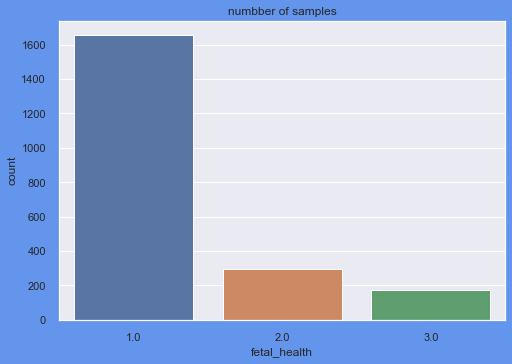

In [25]:
#df_copy.fetal_health.hist()
sns.countplot(data=df_copy, x='fetal_health')
plt.title('numbber of samples')

In [26]:
df_copy.groupby(by='fetal_health').mean()


,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.981873,0.003992,0.007963,0.004781,0.001941,6.042296e-07,0.000051,42.465861,1.430634,5.044713,8.705498,73.400000,91.085801,164.485801,4.163142,0.335347,138.258610,135.102115,138.459819,17.479758,0.341994
2.0,141.684746,0.000275,0.008332,0.002390,0.000536,0.000000e+00,0.000095,61.901695,0.638983,29.030508,8.026102,49.159322,113.294915,162.454237,3.311864,0.244068,146.555932,144.759322,147.071186,7.213559,0.433898
3.0,131.687500,0.000392,0.025676,0.003784,0.003670,3.409091e-05,0.001273,64.539773,1.575568,22.846591,3.588636,78.346591,83.982955,162.329545,4.443182,0.346591,114.607955,112.977273,119.562500,50.732955,-0.073864


In [27]:
#check the data tyes to do encoding
df_copy.dtypes

baseline_value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolonged_decelerations                                   float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [28]:
#independent var and target var
df_features=df_copy.iloc[:,:-1]
df_labels=df_copy.iloc[:,-1]

In [ ]:
#detect the outliers
for i,j in enumerate(df_features.columns):
    q1=df_features[j].quantile(0.25)
    q3=df_features[j].quantile(0.75)
    iqr=q3-q1
    u=q3+1.5*iqr
    l=q1-1.5*iqr

    print('upper_limit',df_features[df_features[j]>u].count()[j])
    print('lower_limit',df_features[df_features[j]<l].count()[j])

upper_limit 0
lower_limit 0
upper_limit 14
lower_limit 0
upper_limit 307
lower_limit 0
upper_limit 1
lower_limit 0
upper_limit 150
lower_limit 0
upper_limit 7
lower_limit 0
upper_limit 178
lower_limit 0
upper_limit 0
lower_limit 0
upper_limit 70
lower_limit 0
upper_limit 309
lower_limit 0
upper_limit 71
lower_limit 0
upper_limit 0
lower_limit 0
upper_limit 0
lower_limit 0
upper_limit 24
lower_limit 0
upper_limit 19
lower_limit 0
upper_limit 502
lower_limit 0
upper_limit 12
lower_limit 61
upper_limit 3
lower_limit 42
upper_limit 5
lower_limit 23
upper_limit 184
lower_limit 0
upper_limit 0
lower_limit 0


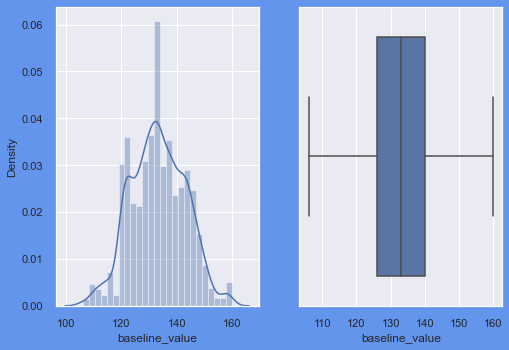

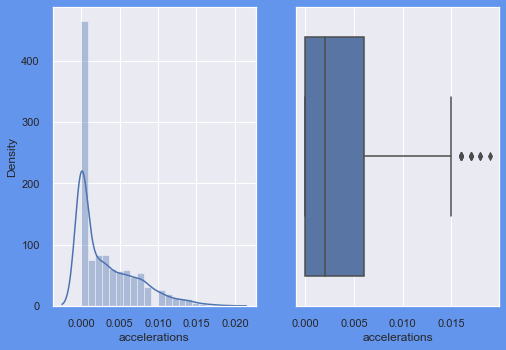

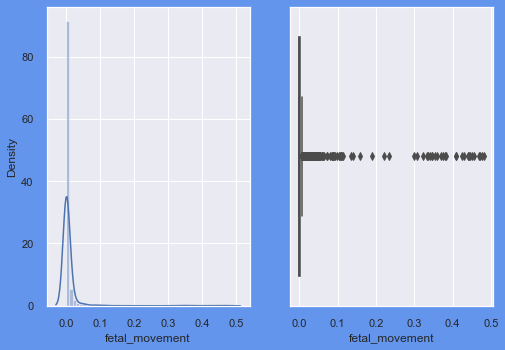

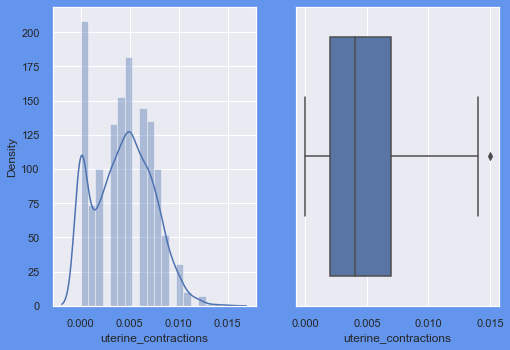

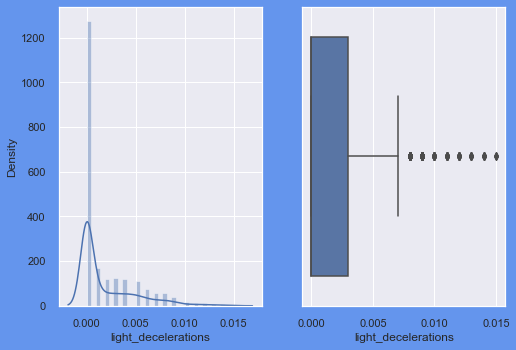

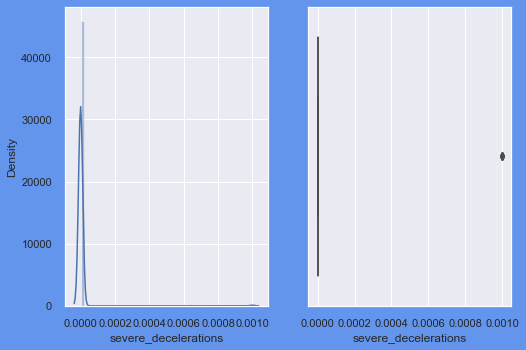

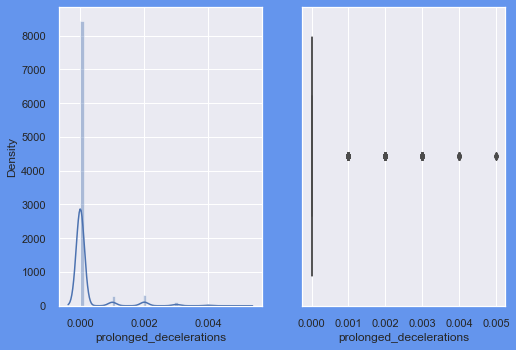

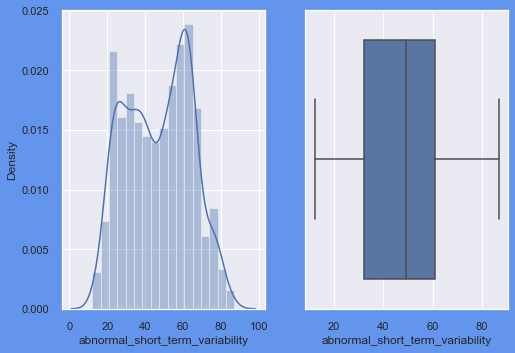

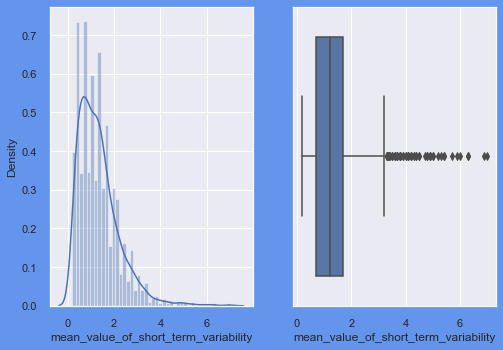

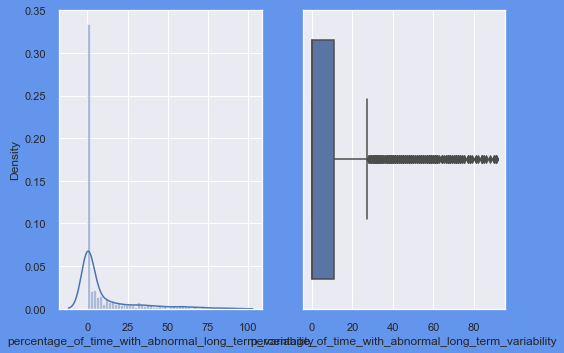

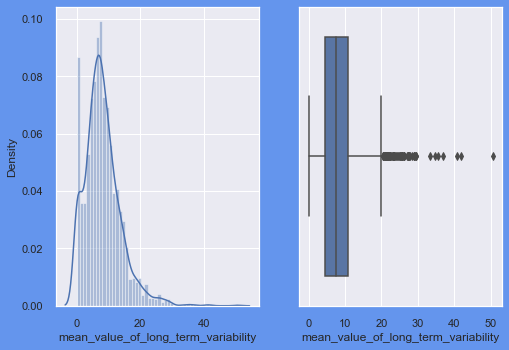

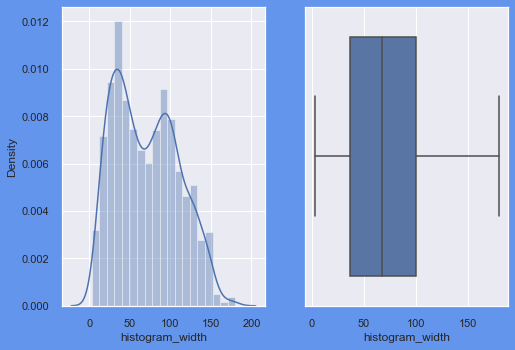

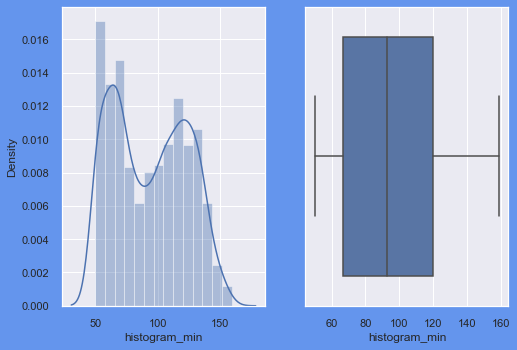

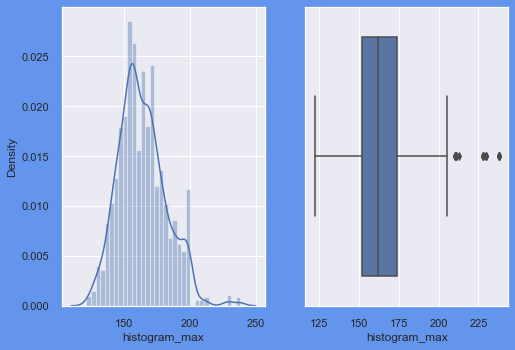

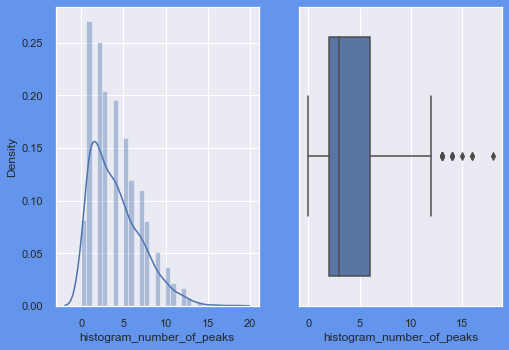

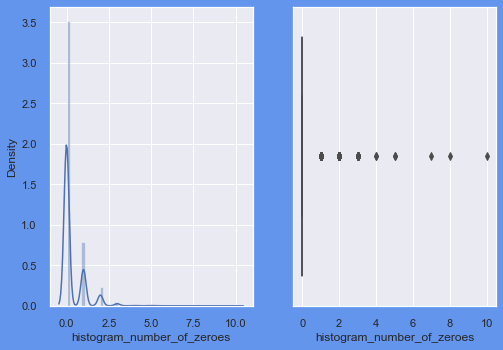

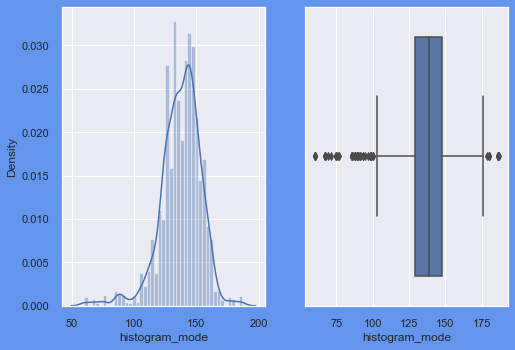

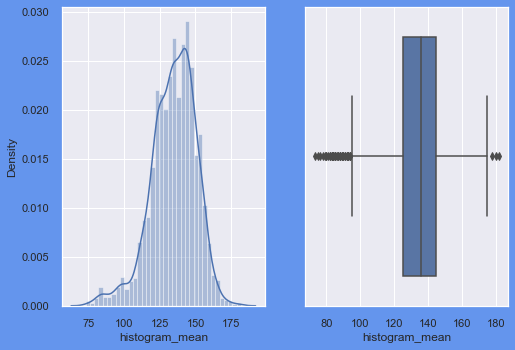

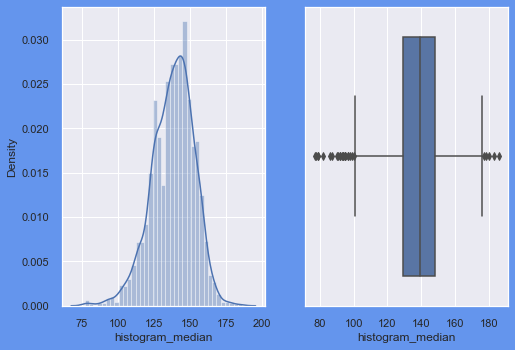

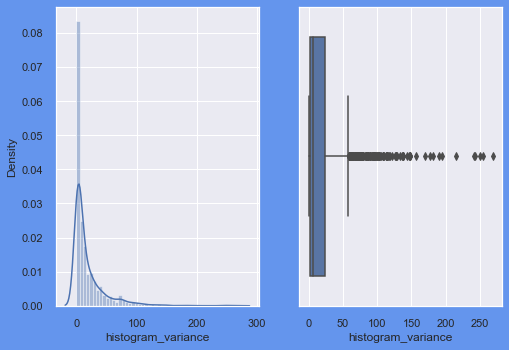

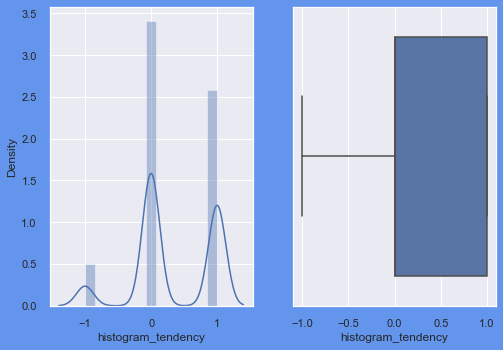

In [29]:
#identifying the data distribution and outliers in our dataset
for i,j in enumerate(df_features.columns):
    plt.subplot(1,2,1)
    sns.distplot(df_copy[j])#hue='fetal_health')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_copy[j],data=df_copy)
    plt.show()

### Saving the cleaned data in pickle file

In [41]:
import pickle
with open('C:\\Users\\acer\\Desktop\\ModelTuning_FetalHealth\\models\\ExploratoryDataAnalysis.pkl', 'wb') as f:
    pickle.dump(df_copy, f)